In [81]:
import numpy as np
import matplotlib.pyplot as plt

## copies and views

In [5]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
b = a[::2]
b

array([0, 2, 4, 6, 8])

In [7]:
np.may_share_memory(a,b)

True

In [8]:
b[0] = 12
b

array([12,  2,  4,  6,  8])

In [9]:
a

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9])

In [10]:
a = np.arange(10)
c = a[::2].copy()
c[0] = 12
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
np.may_share_memory(a,c)

False

# Fancy indexing

## Using boolean masks

In [12]:
np.random.seed(3)
a = np.random.randint(0 , 21, 15)
a

array([10,  3,  8,  0, 19, 10, 11,  9, 10,  6,  0, 20, 12,  7, 14])

In [13]:
a % 3 == 0

array([False,  True, False,  True, False, False, False,  True, False,
        True,  True, False,  True, False, False])

In [14]:
mask = (a % 3 ==0)

In [15]:
extract_from_a = a[mask] # or, a[a%3 == 0]
extract_from_a 

array([ 3,  0,  9,  6,  0, 12])

In [16]:
a[a%3 == 0] = -1
a

array([10, -1,  8, -1, 19, 10, 11, -1, 10, -1, -1, 20, -1,  7, 14])

## indexing with an array of integers

In [17]:
a = np.arange(0, 100, 10)
a

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [18]:
#indexing can be done with an array of integers
#where the same index is repeated several time
a[[2,3,2,4,2]] 

array([20, 30, 20, 40, 20])

In [19]:
#new values can be assigned with this kind of indeging
a[[9,7]] = -100 
a

array([   0,   10,   20,   30,   40,   50,   60, -100,   80, -100])

In [20]:
a = np.arange(10)
idx = np.array([[3, 4], [9, 7]])
idx.shape

(2, 2)

In [21]:
a[idx]

array([[3, 4],
       [9, 7]])

# Numerical operations on arrays

## Basic operations

In [22]:
# with scalars:
a = np.array([1, 2, 3, 4])
a + 1

array([2, 3, 4, 5])

In [23]:
2 ** a

array([ 2,  4,  8, 16], dtype=int32)

In [24]:
# all arithmetic operates elementwise:
b = np.ones(4) + 1
a - b

array([-1.,  0.,  1.,  2.])

In [25]:
a * b

array([2., 4., 6., 8.])

In [26]:
j = np.arange(5)
2 ** (j + 1) - j

array([ 2,  3,  6, 13, 28])

In [27]:
a = np.arange(1000)
%timeit a + 1

1.41 µs ± 43.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [28]:
l = range(10000)
%timeit [ i+1 for i in l]

573 µs ± 27.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [29]:
# Array multiplication is not matrix multiplication,
# Matrix multiplication:
c = np.ones((3,3))

In [30]:
c.dot(c)

array([[3., 3., 3.],
       [3., 3., 3.],
       [3., 3., 3.]])

## Other operations

In [31]:
# comparisons:
a = np.array([1, 2, 3, 4])
b = np.array([4, 2, 2, 4])
a == b

array([False,  True, False,  True])

In [32]:
a > b

array([False, False,  True, False])

In [33]:
# array-wise comparisons:
a = np.array([1, 2, 3, 4])
b = np.array([4, 2, 2, 4])
c = np.array([1, 2, 3 ,4])
np.array_equal(a,b)

False

In [34]:
np.array_equal(a,c)

True

In [35]:
# logicals operations:
a = np.array([1, 1, 0, 0], dtype=bool)
b = np.array([1, 0, 1, 0], dtype=bool)
np.logical_and(a,b)

array([ True, False, False, False])

In [36]:
np.logical_or(a, b)

array([ True,  True,  True, False])

In [37]:
# transcendental functions:
a = np.arange(5)
np.sin(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ])

In [38]:
np.log(a)

C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


array([      -inf, 0.        , 0.69314718, 1.09861229, 1.38629436])

In [39]:
np.exp(a)

array([ 1.        ,  2.71828183,  7.3890561 , 20.08553692, 54.59815003])

In [55]:
# shape Mismatches
a = np.arange(4)
a + np.array([1,2])

ValueError: operands could not be broadcast together with shapes (4,) (2,) 

In [56]:
# transposition
a = np.triu(np.ones((3, 3)), 1)
a

array([[0., 1., 1.],
       [0., 0., 1.],
       [0., 0., 0.]])

In [57]:
help(np.triu)

Help on function triu in module numpy.lib.twodim_base:

triu(m, k=0)
    Upper triangle of an array.
    
    Return a copy of a matrix with the elements below the `k`-th diagonal
    zeroed.
    
    Please refer to the documentation for `tril` for further details.
    
    See Also
    --------
    tril : lower triangle of an array
    
    Examples
    --------
    >>> np.triu([[1,2,3],[4,5,6],[7,8,9],[10,11,12]], -1)
    array([[ 1,  2,  3],
           [ 4,  5,  6],
           [ 0,  8,  9],
           [ 0,  0, 12]])



In [58]:
a.T

array([[0., 0., 0.],
       [1., 0., 0.],
       [1., 1., 0.]])

# Basic Reductions

## Computing Sums

In [59]:
x = np.array([1, 2 ,3 ,4])
np.sum(x)

10

In [60]:
x.sum()

10

In [61]:
# sum by rows and columns:
x = np.array([[1, 1], [2,2]])
x

array([[1, 1],
       [2, 2]])

In [62]:
x.sum(axis=0) #columns (first dimension)

array([3, 3])

In [63]:
x[:, 0].sum(), x[:, 1].sum()

(3, 3)

In [64]:
x.sum(axis=1) #rows (second dimension)

array([2, 4])

In [65]:
x[0, :].sum(), x[1, :].sum()

(2, 4)

## Other Reductions

In [66]:
# Extrema:
x = np.array([1, 3, 2])
x.min()
#x.max()
x.argmin() # index of minimum
x.argmax() # index of maximum

1

In [67]:
x.max()

3

In [68]:
x.argmin()

0

In [69]:
x.argmax()

1

In [49]:
# Logical operations:
np.all([True, True, False])

False

In [50]:
np.any([True, True, False])

True

In [51]:
# Statistics:
x = np.array([1, 2 ,3 ,1])
y = np.array([[1, 2, 3], [5, 6, 1]])
x.mean()

1.75

In [52]:
np.median(x)

1.5

In [53]:
np.median(y, axis = -1) #last axis

array([2., 5.])

In [54]:
x.std() # Population SD

0.82915619758885

In [ ]:
filen = 'C:\\Users\\zt1318\\Downloads\\populations.txt'

## Broadcasting

Basic operations on numpy arrays (addition, etc.) are elementwise

This works on arrays of the same size.

Nevertheless, It’s also possible to do operations on arrays of different
sizes if NumPy can transform these arrays so that they all have
the same size: this conversion is called broadcasting.

In [43]:
a = np.tile(np.arange(0, 40, 10), (3,1)).T
a

array([[ 0,  0,  0],
       [10, 10, 10],
       [20, 20, 20],
       [30, 30, 30]])

In [44]:
b = np.array([0, 1, 2])
a + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

In [41]:
a = np.ones((4,5))
a[0] = 2 # we assign an array of dimension 0 to an array of dimension 1
a

array([[2., 2., 2., 2., 2.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [70]:
a = np.arange(0, 40, 10)
a.shape

(4,)

In [72]:
a = a[:, np.newaxis] #adds a new axis -> 2D array
a.shape

(4, 1, 1)

In [73]:
a

array([[[ 0]],

       [[10]],

       [[20]],

       [[30]]])

In [74]:
a + b

array([[[ 0,  1,  2]],

       [[10, 11, 12]],

       [[20, 21, 22]],

       [[30, 31, 32]]])

In [76]:
# Worked Example: Broadcasting
mileposts = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
distance_array = np.abs(mileposts - mileposts[:, np.newaxis])
distance_array


array([[   0,  198,  303,  736,  871, 1175, 1475, 1544, 1913, 2448],
       [ 198,    0,  105,  538,  673,  977, 1277, 1346, 1715, 2250],
       [ 303,  105,    0,  433,  568,  872, 1172, 1241, 1610, 2145],
       [ 736,  538,  433,    0,  135,  439,  739,  808, 1177, 1712],
       [ 871,  673,  568,  135,    0,  304,  604,  673, 1042, 1577],
       [1175,  977,  872,  439,  304,    0,  300,  369,  738, 1273],
       [1475, 1277, 1172,  739,  604,  300,    0,   69,  438,  973],
       [1544, 1346, 1241,  808,  673,  369,   69,    0,  369,  904],
       [1913, 1715, 1610, 1177, 1042,  738,  438,  369,    0,  535],
       [2448, 2250, 2145, 1712, 1577, 1273,  973,  904,  535,    0]])

In [79]:
x, y = np.arange(5), np.arange(5) [ :, np.newaxis]
distance = np.sqrt(x ** 2 + y ** 2)
distance

array([[0.        , 1.        , 2.        , 3.        , 4.        ],
       [1.        , 1.41421356, 2.23606798, 3.16227766, 4.12310563],
       [2.        , 2.23606798, 2.82842712, 3.60555128, 4.47213595],
       [3.        , 3.16227766, 3.60555128, 4.24264069, 5.        ],
       [4.        , 4.12310563, 4.47213595, 5.        , 5.65685425]])

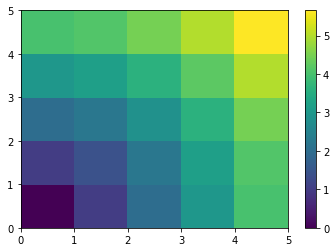

In [82]:
plt.pcolor(distance)
plt.colorbar()

# Array shape manipulation

## Flattening

In [83]:
a = np.array ([[1,2,3],[4,5,6]])
a.ravel()

array([1, 2, 3, 4, 5, 6])

In [84]:
a.T

array([[1, 4],
       [2, 5],
       [3, 6]])

In [85]:
a.T.ravel()

array([1, 4, 2, 5, 3, 6])

## Reshaping

In [86]:
a.shape

(2, 3)

In [87]:
b = a.ravel()
b = b.reshape((2,3))
b

array([[1, 2, 3],
       [4, 5, 6]])

In [88]:
a.reshape((2, -1)) # unspecified (-1) value is inferred

array([[1, 2, 3],
       [4, 5, 6]])

In [89]:
b[0,0] =99
a

array([[99,  2,  3],
       [ 4,  5,  6]])

In [90]:
a = np.zeros((3,2))
b = a.T.reshape(3*2)
b[0] = 9
a

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

## Adding a dimension

In [92]:
# Indexing with the np.newaxis object allows us to add an axis to an array
z = np.array([1,2,3])
z

array([1, 2, 3])

In [93]:
z[:, np.newaxis]

array([[1],
       [2],
       [3]])

In [94]:
z[np.newaxis, :]

array([[1, 2, 3]])

## Dimension shuffling

In [95]:
a = np.arange(4*3*2).reshape(4,3,2)
a.shape

(4, 3, 2)

In [96]:
a[0,2,1]

5

In [97]:
b = a.transpose(1, 2, 0)
b.shape

(3, 2, 4)

In [98]:
b[2,1,0]

5

In [99]:
b[2,1,0] = -1
a[0,2,1]

-1

## Resizing

In [100]:
a = np.arange(4)
a.resize((8,))
a

array([0, 1, 2, 3, 0, 0, 0, 0])

In [101]:
b = a
a.resize(4,)

ValueError: cannot resize an array that references or is referenced
by another array in this way.  Use the resize function

# Sorting Data

In [102]:
a = np.array([[4, 3, 5], [1, 2, 1]])
b = np.sort(a, axis=1)
b

array([[3, 4, 5],
       [1, 1, 2]])

In [103]:
# in place sorting
a.sort(axis=1)
a

array([[3, 4, 5],
       [1, 1, 2]])

In [104]:
# ssorting with fancy indexing
a = np.array([4, 3 ,1, 2])
j = np.argsort(a)
j

array([2, 3, 1, 0], dtype=int64)

In [105]:
a[j]

array([1, 2, 3, 4])

In [108]:
# Finding minima and maxima
a = np.array([4, 3 ,1 ,2])
j_max = np.argmax(a)
j_min = np.argmin(a)
j_max, j_min

(0, 2)